# Rules-based Spacy

### Using SpaCy's EntityRuler

- 2 different ways to add custom features to language-based pipelines: 1) rules-based 2) machine learning based approach 
- Rule-based approach is taken when a set of rules can be generated using a list of known things or rules generated from regex or linguistic features (used to recoginize dates)
- ML-based approach is taken when we don't know the rules or are complicated (used in entity recoginition of names)

In [1]:
import spacy

In [35]:
nlp = spacy.load('en_core_web_sm')
# our code should be able to extract `harry potter` as a movie and 'Azkaban' as a place
text = 'Azkaban was referenced in Harry Potter.'

In [36]:
doc = nlp(text)

In [37]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Azkaban ORG
Harry Potter PERSON


In [38]:
ruler = nlp.add_pipe('entity_ruler')

In [31]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [39]:
# adding patterns in the pipelines
patterns = [
    {'label': 'GPE', 'pattern': 'Azkaban'}
]

In [41]:
ruler.add_patterns(patterns)

In [43]:
doc2 = nlp(text)
for ent in doc2.ents:
    print(ent.text, ent.label_)

Azkaban ORG
Harry Potter PERSON


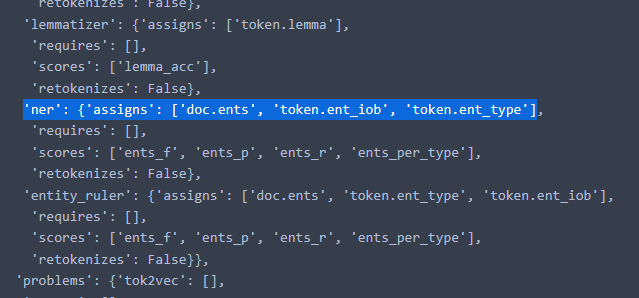

The `ner` should be after the `entity_ruler` pipe in order for `Azkaban` to be categorized as `GPE`.

In [47]:
nlp2 = spacy.load('en_core_web_sm')

In [48]:
# to add the entity_ruler before ner, the parameter `before` is sent
ruler = nlp2.add_pipe('entity_ruler', before='ner')

In [49]:
ruler.add_patterns(patterns)

In [50]:
doc = nlp2(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

Azkaban GPE
Harry Potter PERSON


In [51]:
nlp2.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [52]:
# adding `film` as a custom label

nlp3 = spacy.load('en_core_web_sm')

In [53]:
ruler = nlp3.add_pipe('entity_ruler', before = 'ner')

In [54]:
patterns = [ 
    {'label': 'GPE', 'pattern': 'Azkaban'}, 
    {'label': 'FILM', 'pattern': 'Harry Potter'}
]

In [56]:
ruler.add_patterns(patterns)

In [57]:
doc = nlp3(text)

In [58]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Azkaban GPE
Harry Potter FILM


`NOTE`: But identifying `Harry Potter` as a film could cause a clash when a person is actually named as `Harry Potter`, due to our model recoginizing it as a film. This is called a `toponym`. A toponym resolution refers to when a word can have multiple label that are dependent upon context.